In [1]:
import numpy as np
from skimage import io, color, exposure, filters, morphology, measure
from scipy.ndimage.morphology import binary_fill_holes
import matplotlib.pyplot as plt

example_file = "CorePhotos/CoreLab_WL/Core_1/10700.0-10703.7.tif"
example_file2 = "CorePhotos/CoreLab_WL/Core_1/10620.0-10630.0__c1.tif"

%matplotlib inline

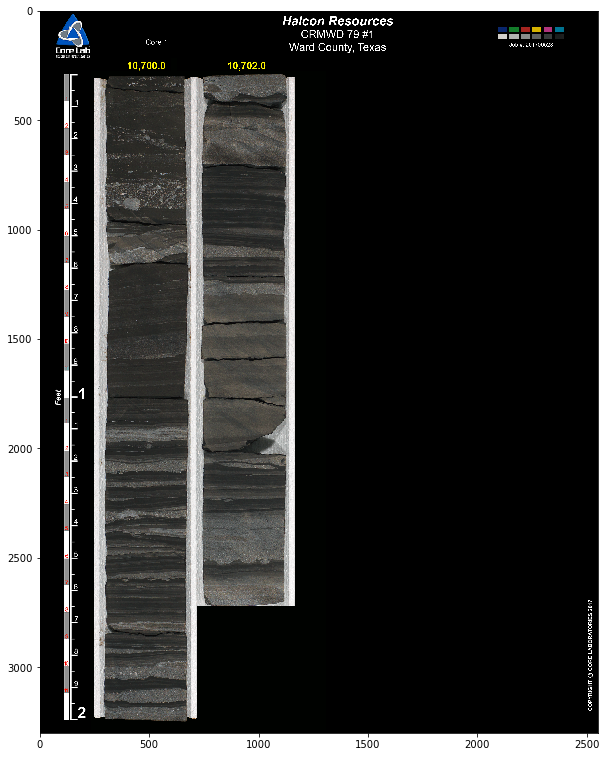

In [2]:
img = io.imread(example_file)
gimg = color.rgb2gray(img)
fig, ax = plt.subplots(figsize=(10,15))
ax.imshow(img)

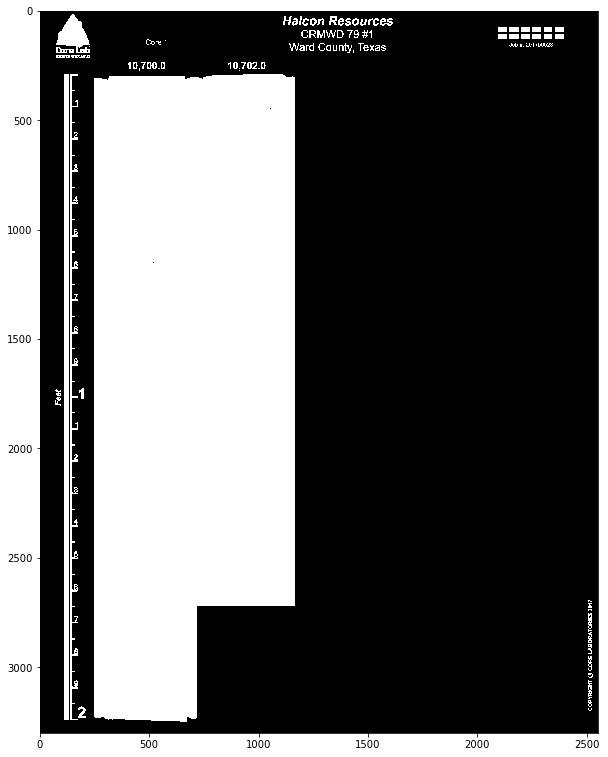

In [10]:
mask = gimg > 0.01
fig, ax = plt.subplots(figsize=(10,15))
#ax.imshow(img) #* ~np.repeat(black_mask[:,:,np.newaxis],3,axis=2))
ax.imshow(mask, cmap="gray")

2948


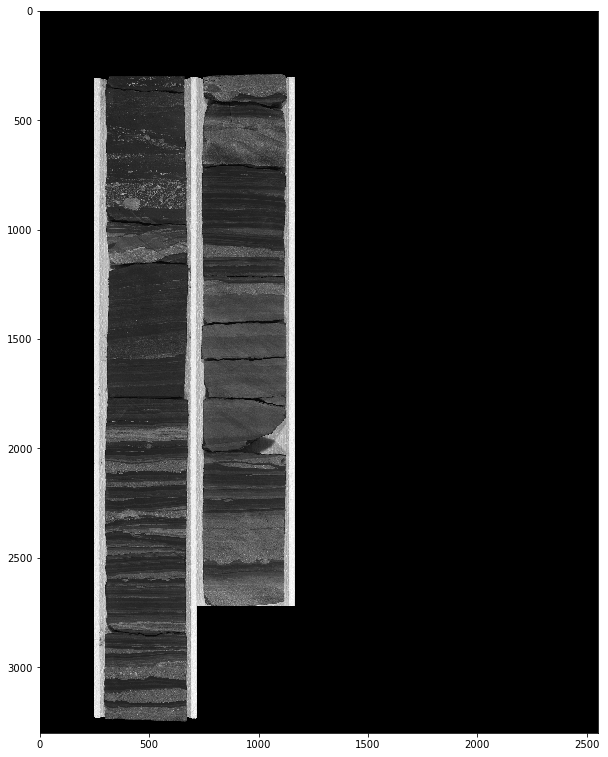

In [79]:
fig, ax = plt.subplots(figsize=(10,15))
foreground = gimg > 0.01
foreground = morphology.remove_small_holes(foreground)
# min_size = (gimg.size/500) catches everything but sample box and scale
foreground = morphology.remove_small_objects(foreground, min_size=(gimg.size/500))

# scale stuff
labeled = measure.label(foreground)

half_y = gimg.shape[0]//2
left_scale_loc = np.nonzero(labeled[half_y,:])[0][0]

scale_label = labeled[half_y, left_scale_loc]
scale_region = measure.regionprops(labeled)[scale_label-1]

pixels_24in = scale_region.bbox[2] - scale_region.bbox[0]
print(pixels_24in)

# min_size = (gimg.size/100) then removes scale
foreground = morphology.remove_small_objects(foreground, min_size=(gimg.size/100))

background_removed = foreground.astype(int)*gimg

plt.imshow(background_removed, cmap='gray')

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


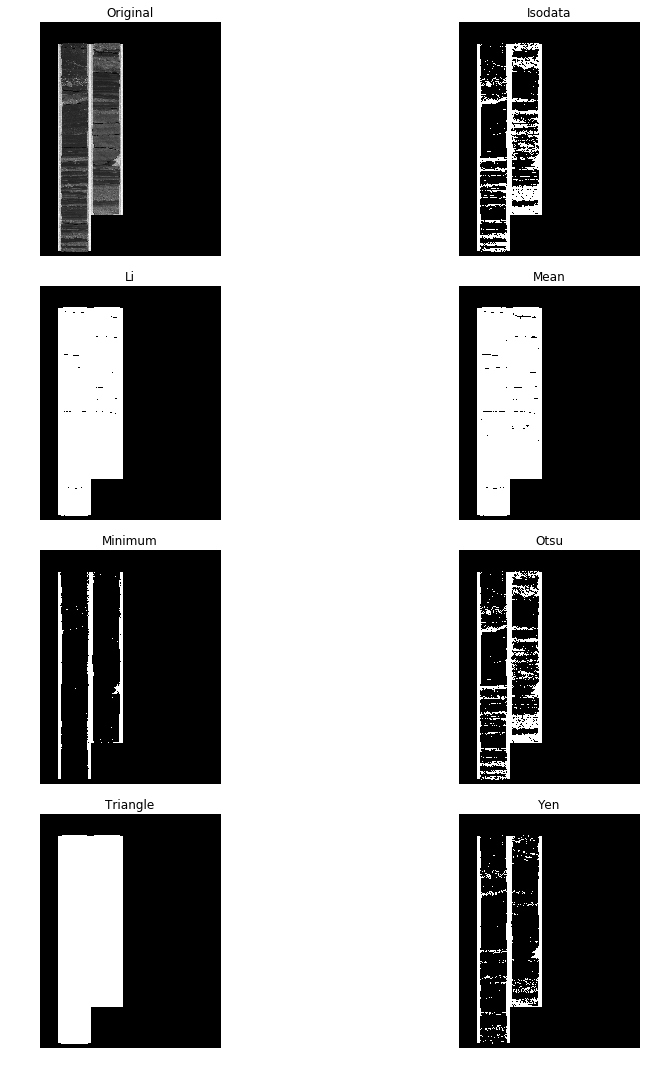

In [80]:
fig, ax = filters.try_all_threshold(background_removed, figsize=(15,15))

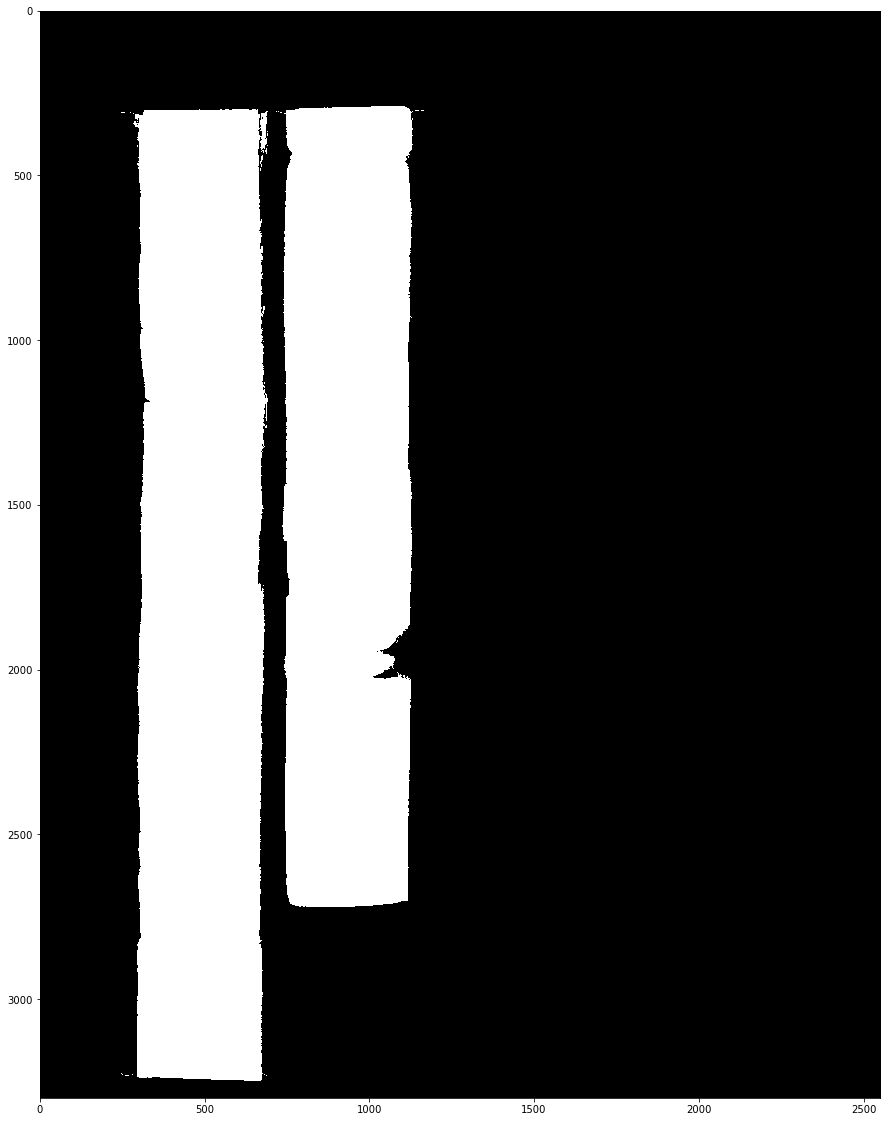

In [85]:
fig, ax = plt.subplots(figsize=(20,20))
not_container = background_removed < filters.threshold_minimum(background_removed)
not_container = morphology.remove_small_holes(not_container, min_size=500)
not_container = morphology.remove_small_objects(not_container, min_size=10000)
rock = foreground & not_container
ax.imshow(rock, cmap="gray")

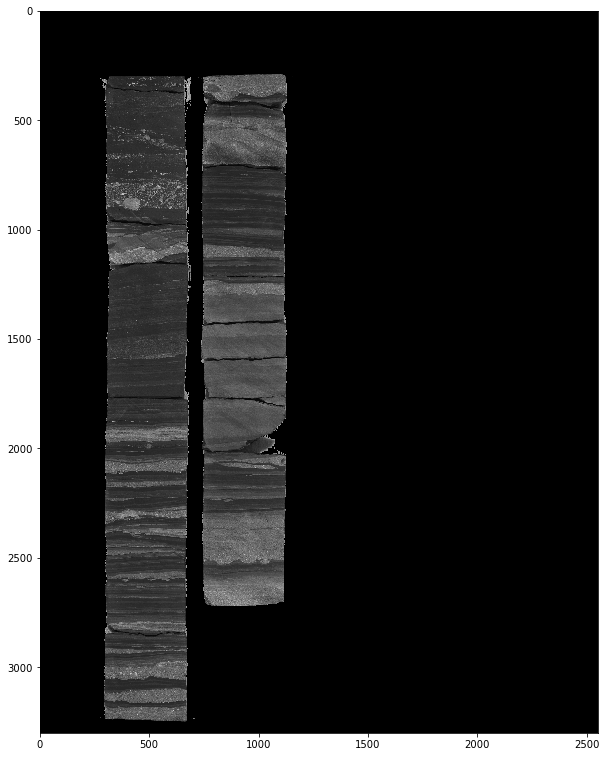

In [86]:
fig, ax = plt.subplots(figsize=(10,15))
ax.imshow(rock.astype(int)*gimg, cmap="gray")

'\nselem = morphology.square(50)\nsmoothed = filters.rank.mean(rock.astype(int)*255, selem=selem)\nax.imshow(smoothed, cmap="gray")\n'

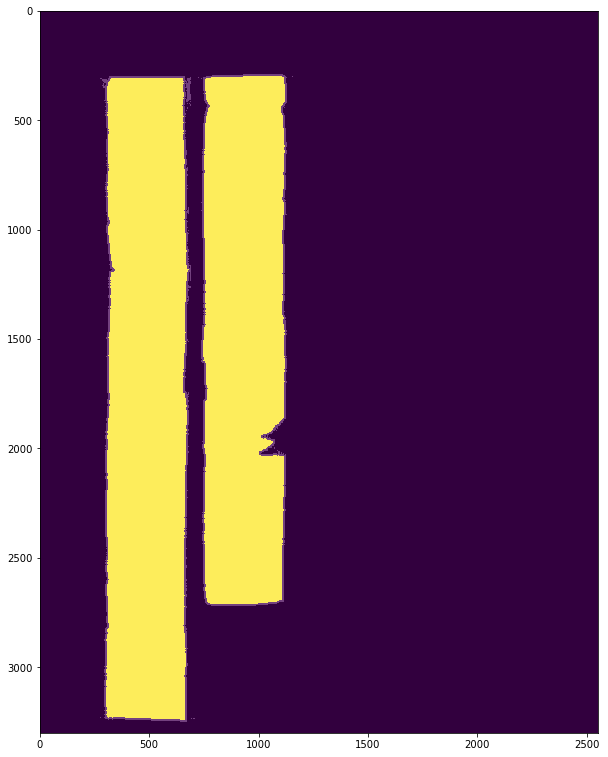

In [88]:
fig, ax = plt.subplots(figsize=(10,15))
ax.imshow(rock2, cmap='gray')
eroded = morphology.binary_erosion(rock, selem=morphology.disk(10))
ax.imshow(morphology.binary_dilation(eroded), alpha=0.75)
'''
selem = morphology.square(50)un
smoothed = filters.rank.mean(rock.astype(int)*255, selem=selem)
ax.imshow(smoothed, cmap="gray")
'''

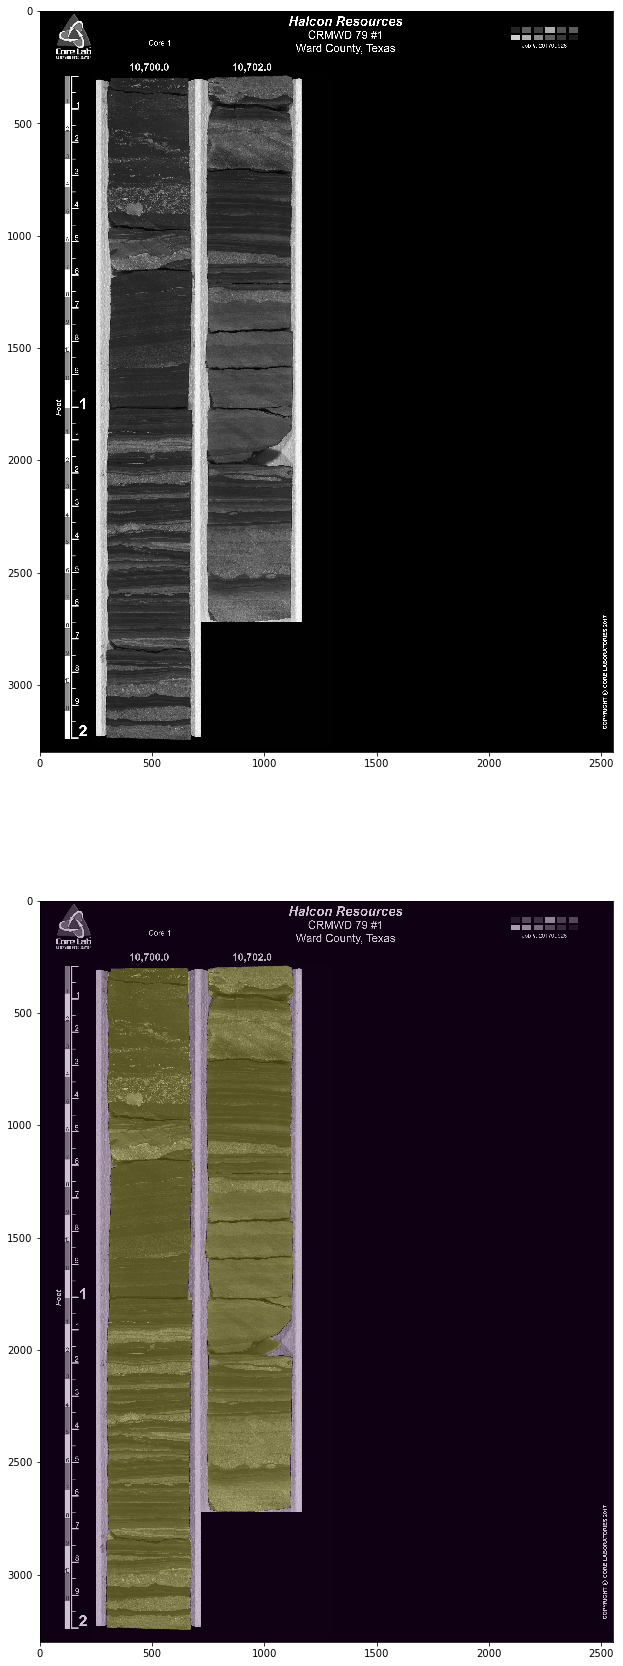

In [93]:
fig, ax = plt.subplots(2, figsize=(30,30))
dilated = morphology.binary_dilation(eroded, selem=morphology.disk(8))
ax[0].imshow(gimg, cmap='gray')
ax[1].imshow(gimg, cmap='gray')
ax[1].imshow(dilated, alpha=0.25)

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
sample_material = dilated.astype(int)*gimg
ax.imshow(sample_material, cmap='gray')

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
labels = measure.label(dilated, background=0)

ax.imshow(labels)

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))

prop1 = measure.regionprops(labels)[0]
prop2 = measure.regionprops(labels)[1]

ax.imshow(sample_material, cmap="gray")
ax.imshow(prop2.convex_image, alpha=0.5)

In [95]:
gimg.size

8415000